(runge_kutta_method)=
# Runge-Kutta method
```{index} Runge-Kutta method
```
[Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4) is most commonly used method for integrating {ref}`Ordinary Differential Equations (ODEs) <ode_linear>`. This method takes into account slope at the beginning, middle (twice) and the end of interval to integrate an ODE with a 4th order accuracy.

## 1st order ODE integration

Consider a continuous function $f(x,y)$, where $x$ is the independent variable and $y$ is the dependent variable -

$$\frac{dy}{dx}=f(x,y)\text{.}$$

Our aim is to find $y(x)$ and to achieve that, we need to:
* know the value of $y=y_0$ at some initial value of $x=x_0$
* step forward from the initial point using finite steps of size $\Delta x$
* know how much $y$ changes for each step in $x$

In RK4 method, the independent variable is incremented in steps and the new value for the dependent variable is calculated at the end of each step according to -

$$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4)\text{,}$$

$$x_{i+1} = x_i + \Delta x,$$

where $\Delta x$ is the increment, $k_1, k_2, k_3$ and $k_4$ are slopes calculated as follows -

$$k_1 = \Delta x f(x_i, y_i),\\\\\\
k_2 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_1),\\\\\\
k_3 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_2).\\\\\\
k_4 = \Delta x f(x_i + \Delta x, y_i + k_3).$$

In this notebook, we will learn how to integrate ODEs with this method.

At first, let's create a `RungeKutta` function that will calculate slopes and return $x$ and $y$ at new step.

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 12})

In [13]:
def RungeKutta(x, y, dx, dydx):
    
    # Calculate slopes
    k1 = dx*dydx(x, y)
    k2 = dx*dydx(x+dx/2., y+k1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2.)
    k4 = dx*dydx(x+dx, y+k3)
    
    # Calculate new x and y
    y = y + 1./6*(k1+2*k2+2*k3+k4)
    x = x + dx
    
    return x, y

Analytical solution to the ODE

$$f(x,y)=\frac{dy}{dx}=x^2,$$

with initial values $x_0 = 1$ and $y_0=1$ is

$$y(x)=\frac{x^3}{3}+\frac{2}{3}.$$

Let's solve this equation numerically with RK4 method, with increment $\Delta x=0.1$ and final position $x_{end}=2.$

At first we will define our function $f(x,y)$ as `dxdy1` and analaytical solution as `y1`:

In [14]:
def dydx1(x, y):
    return x**2

def y1(x):
    return x**3/3.+2/3.

Now we need to set up initial values in the problem - starting positions $x_0$ and $y_0$, as well as the increment and ending position:

In [15]:
x0 = 1.
y0 = 1.
dx = 0.1
x_end = 2.

To find a solution with RK4 method, we will need to loop over $x$ values, increasing them by $\Delta x$ each step until they reach $x_{\text{end}}$. We will also create lists that calculated $x$ and $y$ values will be appended to, so that we can plot them afterwards.

In [16]:
x_rk = [x0]
y_rk = [y0]

y = y0
x = x0

while x <= x_end:
    
    x, y = RungeKutta(x, y, dx, dydx1)

    x_rk.append(x)
    y_rk.append(y)

As mentioned before, RK4 method is 4th order accurate, while Euler method is 2nd order accurate. To compare the solutions, we will also define `Euler` function and solve the ODE accordingly.

In [18]:
def Euler(x, y, dx, dydx):
    return x+dx, y+dx*dydx(x, y)

x_eu = [x0]
y_eu = [y0]

y = y0
x = x0

while x <= x_end:
    
    x, y = Euler(x, y, dx, dydx1)

    x_eu.append(x)
    y_eu.append(y)

We can plot results together on one graph:

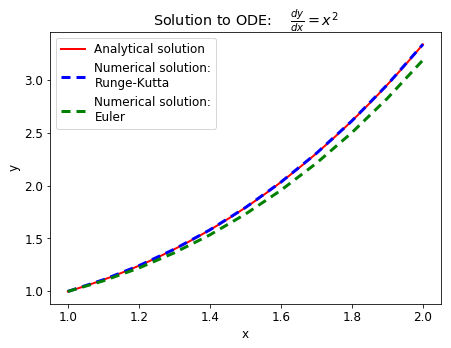

In [24]:
plt.figure(figsize=(7,5))

plt.plot(np.linspace(1,2,50), y1(np.linspace(1,2,50)), 
         label="Analytical solution",color="red", lw=2)

plt.plot(x_rk, y_rk, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",
        lw=3)
plt.plot(x_eu, y_eu, label="Numerical solution:\nEuler", dashes=(3,2), color="green",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=x^2$")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

As we can see, Runge-Kutta is much more accurate than Euler method. That's the reson why it is more often used when integrating ODEs. In this case Euler method underestimated the analytical solution.

### Exercise
Let's solve 

$$\frac{dy}{dx}=\frac{1}{xy}$$

numerically with Runge-Kutta method. We will assume again that $x_0 = 1$, $y_0=1$, $\Delta x=0.1$ and 
$x_{\text{end}}=2.$. The analytical solution to this example is

$$\sqrt{1+2\log{x}}.$$

````{admonition} Define functions
:class: dropdown, tip
```python
def dydx2(x, y):
    return 1/(x*y)

def y2(x):
    return np.sqrt(1+2*np.log(x))
```

````

````{admonition} Define necessary variables
:class: dropdown, tip
```python
x0 = 1.
y0 = 1.
dx = 0.1
xend = 2.

x_rk = [x0]
y_rk = [y0]
```

````


````{admonition} Solve the ODE with RK4 method
:class: dropdown, tip
```python
x = x0
y = y0

while x <= xend:
    
    x, y = RungeKutta(x, y, dx, dydx2)
    
    x_rk.append(x)
    y_rk.append(y)
```

````

````{admonition} Solve the ODE with Euler method
:class: dropdown, tip
```python
x_eu = [x0]
y_eu = [y0]

x = x0
y = y0

while x <= xend:  

    x, y = Euler(x, y, dx, dydx2)
    
    x_eu.append(x)
    y_eu.append(y)
```
````

In [25]:
def dydx2(x, y):
    return 1/(x*y)

def y2(x):
    return np.sqrt(1+2*np.log(x))

x0 = 1.
y0 = 1.
dx = 0.1
xend = 2.

x_rk = [x0]
y_rk = [y0]

x = x0
y = y0

while x <= xend:
    
    x, y = RungeKutta(x, y, dx, dydx2)
    
    x_rk.append(x)
    y_rk.append(y)
    
    
x_eu = [x0]
y_eu = [y0]

x = x0
y = y0

while x <= xend:  

    x, y = Euler(x, y, dx, dydx2)
    
    x_eu.append(x)
    y_eu.append(y)

In this example, Euler method overestimated the solution, while RK4 method proves to be very accurate:

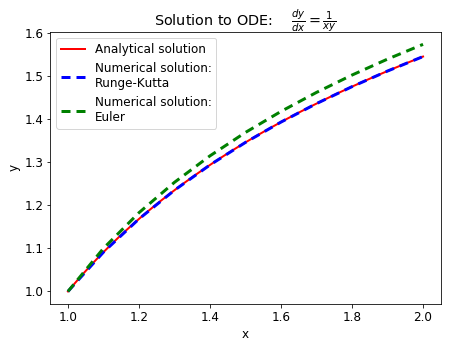

In [28]:
plt.figure(figsize=(7,5))

plt.plot(np.linspace(1,2,50), y2(np.linspace(1,2,50)), 
         label="Analytical solution",color="red", lw=2)

plt.plot(x_rk, y_rk, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",
        lw=3)
plt.plot(x_eu, y_eu, label="Numerical solution:\nEuler", dashes=(3,2), color="green",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=\frac{1}{xy}$")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()

## Coupled ODEs integration

Often systems will have more than one dependent variable. In order to be solved, we will need the same number of differential equations as the number of independent variables.

Let's assume a system with two coupled ODEs, with two dependent variables $y$ and $z$, and one independent variable $x$ -

$$\frac{dy}{dx}=f(x,y,z),\quad \frac{dz}{dx}=g(x,y,z).$$

Solving it with Runge-Kutta will be very similar to solving one equation. We will now have to define slopes for two functions.

Initial slopes -

$$k_1 = \Delta x f(x_i, y_i, z_i),$$

$$h_1 = \Delta x g(x_i, y_i, z_i).$$

Middle slopes -

$$k_2 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_1, z_i+0.5h_1),$$

$$h_2 = \Delta x g(x_i + 0.5 \Delta x, y_i + 0.5 k_1, z_i+0.5h_1),$$

$$k_3 = \Delta x f(x_i + 0.5 \Delta x, y_i + 0.5 k_2, z_i+0.5h_2),$$

$$h_3 = \Delta x g(x_i + 0.5 \Delta x, y_i + 0.5 k_2, z_i+0.5h_2).$$

Final slopes-

$$k_4 = \Delta x f(x_i + \Delta x, y_i + k_3, z_i + h_3),$$

$$h_4 = \Delta x g(x_i + \Delta x, y_i + k_3, z_i + h_3).$$

Then, $x, y, z$ are updated according to -

$$y_{i+1} = y_i + \frac{1}{6}(k_1+2k_2+2k_3+k_4),$$

$$z_{i+1} = z_i + \frac{1}{6}(h_1+2h_2+2h_3+h_4),$$

$$x_{i+1} = x_i + \Delta x.$$

To solve the ODEs, we will need starting positions $x_0, y_0$ and $z_0$.

We can define `RungeKuttaCoupled` for coupled ODEs solution:

In [29]:
def RungeKuttaCoupled(x, y, z, dx, dydx, dzdx):
    
    k1 = dx*dydx(x, y, z)
    h1 = dx*dzdx(x, y, z)
    k2 = dx*dydx(x+dx/2., y+k1/2., z+h1/2.)
    h2 = dx*dzdx(x+dx/2., y+k1/2., z+h1/2.)
    k3 = dx*dydx(x+dx/2., y+k2/2., z+h2/2.)
    h3 = dx*dzdx(x+dx/2., y+k2/2., z+h2/2.)
    k4 = dx*dydx(x+dx, y+k3, z+h3)
    h4 = dx*dzdx(x+dx, y+k3, z+h3)

    y = y + 1./6.*(k1+2*k2+2*k3+k4)
    z = z + 1./6.*(h1+2*h2+2*h3+h4)
    x = x + dx
    
    return x, y, z

### Mass hanging from a spring

We can use RK4 for coupled ODEs to solve for position and velocity of a mass hanging from a spring as a function of time.

The spring obeys Hooke's law:

$$F_x = -kx,$$
where $x$ is the displacement of the spring and $F_s$ is the force exerted by the spring. The force due to gravity can be written as:

$$F_g=-mg,$$
where $m$ is the mass of the weight and $g$ is the acceleration due to gravity. By force balance, we obtain:

$$m\frac{dv}{dt}=-kx-mg,$$
where $v$ is the velocity of the mass. Dividing the equation by $m$, we obtain:

$$\frac{dv}{dt}=-\frac{k}{m}x-g.$$
This is our first ODE to be solved.

We can also note, that by definition $\frac{dx}{dt}=v$, therefore our coupled ODE system is:
1. $\frac{dv}{dt}=-\frac{k}{m}x-g$
2. $\frac{dx}{dt}=v$

We will now solve for position and velocity of the mass as a function of time, assuming that the mass is initially at rest ($v_0=0$ at $x_0=0$ and $t_0=0$). We will use $g=1$, $\frac{k}{m}=1$, $\Delta t=0.1$ and $t_{end}=30$.

We need to think what are our variables in terms of $(x, y, z)$ in the `RungeKuttaCoupled` funciton. We know that that $v$ and $x$ depend on time, therefore we will have $(x, y, z)\rightarrow (t, v, x)$. Now we can write functions for the variables accordingly:

In [30]:
def dvdt(t, v, x):
    return -1.*x-1.

def dxdt(t, v, x):
    return v

We will again define initial values for our variables, increment and $t_{end}$:

In [32]:
t0 = 0
v0 = 0
x0 = 0
dt = 0.1
t_end = 30

We can now iterate over time increments to obtain position and velocity. Make sure that the order of derivatives matches the order of independent variables taken by `RungeKuttaCoupled`:

In [33]:
t_list = [t0]
v_list = [v0]
x_list = [x0]

t = t0
v = v0
x = x0

while t <= t_end:
    
    t, v, x = RungeKuttaCoupled(t, v, x, dt, dvdt, dxdt)
    
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)

The results show an oscillatory motion, with velocity being out of phase.

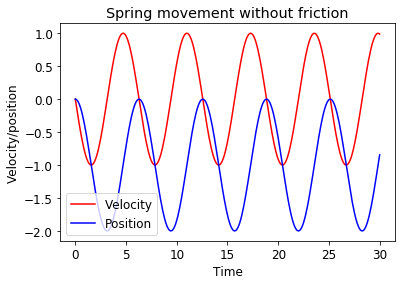

In [290]:
plt.title("Spring movement without friction")
plt.plot(t_list, v_list, label="Velocity", color="red")
plt.plot(t_list, x_list, label="Position", color="blue")
plt.xlabel("Time")
plt.ylabel("Velocity/position")
plt.legend(loc="best")
plt.show()

The numerical solution looks consistent with behaviour in real world, however, in reality friction dampens the motion.

Therefore, we can solve a new set of ODEs that take into account friction that obeys equation:

$$F_{friction} = -fv.$$

Our new system of ODEs is then:
1. $\frac{dv}{dt}=-g-\frac{k}{m}x-\frac{f}{m}v$
2. $\frac{dx}{dt}=v$

Assuming $\frac{f}{m}=0.2$, we can calculate new trajectory of the mass.

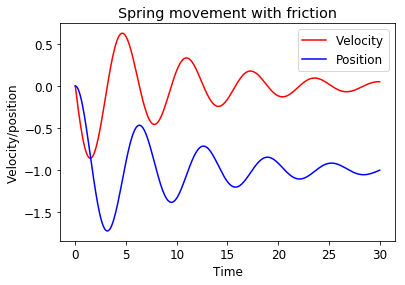

In [34]:
def dvdt(t, v, x):
    return -1*x-1-0.2*v

def dxdt(t, v, x):
    return v

t_list = [t0]
v_list = [v0]
x_list = [x0]

t = t0
v = v0
x = x0

while t <= t_end:
    
    t, v, x = RungeKuttaCoupled(t, v, x, dt, dvdt, dxdt)
    
    t_list.append(t)
    v_list.append(v)
    x_list.append(x)
    
plt.title("Spring movement with friction")
plt.plot(t_list, v_list, label="Velocity", color="red")
plt.plot(t_list, x_list, label="Position", color="blue")
plt.xlabel("Time")
plt.ylabel("Velocity/position")
plt.legend(loc="best")
plt.show()

(nm_runge_kutta_higher_order_ode)=
## Higher order ODEs
Higher order ODEs are often encountered in nature. For example, diffusion and heat transfer are 2nd order ODEs. The order of an ODE indicates which derivatives it contains. Diffusion and heat transfer equations will therefire include second derivatives.

To solve a higher order ODE with Runge-Kutta method we must break it down into a set of 1st order ODEs. For example, if we have a second order ODE:

$$\frac{d^2y}{dx^2}=f(x,y,\frac{dy}{dx}),$$

we can make the following substitution to solve the system as two coupled 1st order ODEs:

$$\frac{dy}{dx}=z, \quad \frac{dz}{dx}=f(x,y,z).$$

### Temperature profile in a rod

A long thin rod connects two bodies with different temperatures. At steady state, the temperature profile in a long thin rod is governed by the following equation:

$$\frac{d^2\tau}{dx^2}=-K(\tau-\tau_{ext}),$$

where $\tau$ is a non-dimensional temperature, $\tau_{ext}$ is the temperature of the environment to which heat is being lost. $K$ is a ratio of the heat transfer to the environment versus the conduction along the rod.

The heat flux, $H,$ is given by the following relationship:

$$H=-\frac{d\tau}{dx}.$$

We can rewrite the system into two 1st order ODEs by using heat flux $H$.

At first we need to change the first equation to involve $H$:

$$\frac{d^2\tau}{dx^2}=\frac{d}{dx}\left(\frac{dx}{d\tau}\right), \quad \frac{d\tau}{dx}=-H.$$

Therefore,

$$\frac{d(-H)}{dx}=-K(\tau-\tau_{ext}) \Rightarrow \frac{dH}{dx}=K(\tau-\tau_{ext}).$$

Assuming $H_0=10$, $\tau_0=100$, $\tau_{ext}=0$, $\Delta x = 0.01$ and $K=1$, we can calculate the temperature and heat flux out of the other end of the rod of length 1.

We can define functions for derivatives:

In [45]:
def dHdx(x, t, H):
    # dH/dx = K*(t-t_ext)
    # K = 1
    # t_ext = 0
    return t

def dtdx(x, t, H):
    return -H

Define variables:

In [46]:
H0 = 10
t0 = 100
x0 = 0
x_end = 1
dx = 0.01

Solve for temperature and heat flux:

In [47]:
x_list = [x0]
t_list = [t0]
H_list = [H0]

x = x0
t = t0
H = H0

while x <= x_end:
    
    x, t, H = RungeKuttaCoupled(x, t, H, dx, dtdx, dHdx)
    
    x_list.append(x)
    t_list.append(t)
    H_list.append(H)

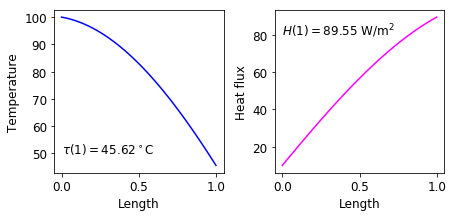

In [48]:
fig, axes = plt.subplots(1,2,figsize=(7,3))

ax1 = axes[0]
ax2 = axes[1]

ax1.plot(x_list, t_list,
        color="blue")
ax1.set_xlabel("Length")
ax1.set_ylabel("Temperature")
ax1.text(0,50,r"$\tau(1)=%.2f^\circ$C" % t_list[-1])

ax2.plot(x_list, H_list,
        color="magenta")
ax2.set_xlabel("Length")
ax2.set_ylabel("Heat flux")
ax2.text(0,80,r"$H(1)=%.2f$ W/m$^2$" % H_list[-1])

plt.subplots_adjust(wspace=0.3)

plt.show()

What happens if we change the external temperature between 0 and 100$^\circ$C?

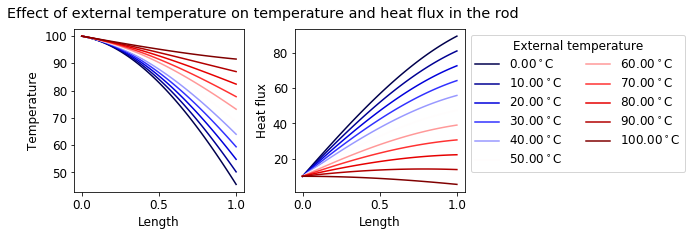

In [43]:
fig, axes = plt.subplots(1,2,figsize=(7,3))

ax1 = axes[0]
ax2 = axes[1]

temp_list = []

flux_list = []

temps = np.linspace(0, 100, 11)

colors = plt.cm.seismic(np.linspace(0,1,len(temps)))

for i in range(len(temps)):
    
    x_list = [x0]
    t_list = [t0]
    H_list = [H0]

    x = x0
    t = t0
    H = H0
    
    def dHdx(x, t, H):
        return t-temps[i]

    while x <= x_end:

        x, t, H = RungeKuttaCoupled(x, t, H, dx, dtdx, dHdx)
        
        x_list.append(x)
        t_list.append(t)
        H_list.append(H)
        
    ax1.plot(x_list, t_list, color=colors[i])
    ax2.plot(x_list, H_list, color=colors[i], label="%.2f$^\circ$C" % temps[i])

ax1.set_xlabel("Length")
ax1.set_ylabel("Temperature")

ax2.set_xlabel("Length")
ax2.set_ylabel("Heat flux")

ax2.legend(bbox_to_anchor=[1,1], ncol=2,
          title="External temperature")

plt.subplots_adjust(wspace=0.3)
plt.suptitle("Effect of external temperature on temperature and heat flux in the rod")
plt.show()

As the external temperature decreases, the temperature profile in the rod decreases as well. Heat flux, however, increases at the other end of the rod as the gradient in temperature becomes sharper.